In [9]:
from IPython.display import Image

import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import HTML

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead, BoxAnnotation, Legend
from bokeh.layouts import gridplot
output_notebook()

Loading BokehJS ...

# L'agent Logan : exercice de cinématique

Lancé à la poursuite d'un criminel, l'agent Logan du FBI doit traverser une rivière d'une largeur de 1600 m qui coule à 0.80 m$\cdot$s$^{-1}$ en un minimum de temps et se rendre directement en face de son point de départ. Sachant qu'il peut ramer à 1.50 m$\cdot$s$^{-1}$ et courir à 3.00 m$\cdot$s$^{-1}$, décrivez la route qu'il devrait suivre (en bateau et à pied le long de la rive) pour traverser ce cours d'eau le plus rapidement possible.
Déterminez le temps minimal requis pour cette traversée.


## On commence par un schéma...

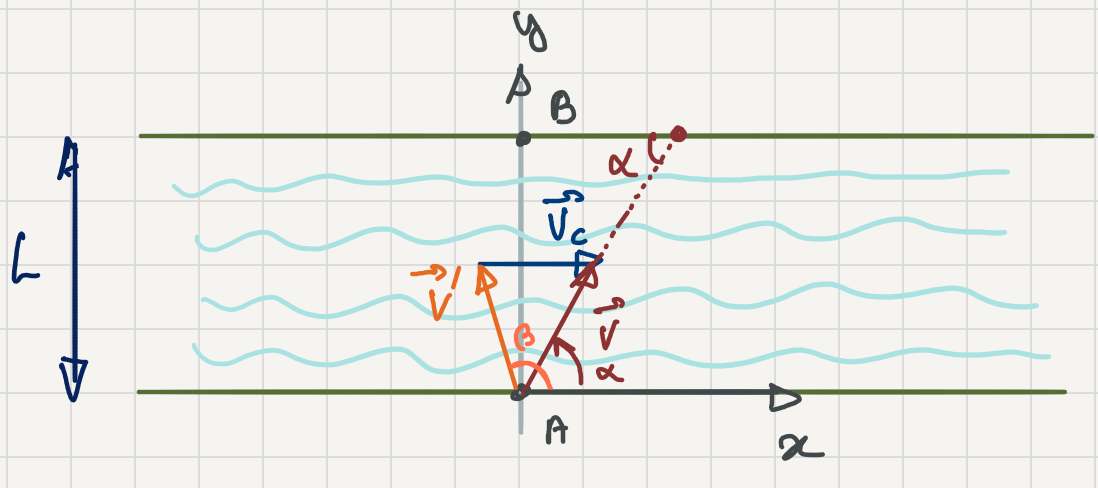

In [2]:
Image("Logan.png")

## On analyse le problème et on affine  la marche à suivre

Logan doit aller de A à B le plus vite possible (pas forcément en ligne droite), 
sa vitesse par rapport à la rivière est $\vec v'$, la vitesse du courant $\vec v_c$, donc sa vitesse par rapport à la rive est $\vec v = \vec  v' + \vec v_c$. 

Il choisit l'angle $\beta$. Si il ne choisit pas un beta tel que $\alpha$ vaille 90°, il ne va pas débarquer en B, et devra courir un peu sur la rive. Mais comme il court plus vite qu'il ne rame, cela peut être une bonne idée si il choisit un beta qui va lui permettre de gagner du temps sur la traversée. 

Le but est de choisir l'angle qui lui donne le meilleur temps. C'est un problème d'optimisation. On exprime le temps total en fonction du paramètre libre ($\beta$) et on cherche la valeur de $\beta$ qui donne le minimum.

# Représentation graphique 

### Fonctions et paramètres

In [3]:
# vecteur vitesse du rameur par rapport au courant (v') en fonction de l'angle beta (variable) et 
# de la norme de la vitesse à la rame (v_ramer)

v_ramer_ = lambda beta, v_ramer: [np.linspace(0, 200*np.cos(beta)*v_ramer, 100), \
                                  np.linspace(0, 200*np.sin(beta)*v_ramer, 100)]

In [4]:
# Définition des paramètres initiaux
l = 1600 #largeur de la rivière (m)
v_courant = 0.8 # vitesse du courant (m/s)
v_ramer = 1.5 # vitesse à la rame (m/s)
v_course = 3.0 # vitesse à la course (m/s)
point_a = 0 # point de départ (coordonnée x)
point_b = 0 # point d'arrivée (coordonnée y)

beta = 90 # angle de départ

omega= np.pi*20/180 # Cet angle sert à dessiner les têtes des flèches

### Calcul analytique 1

Le temps de traversée à la rame peut être calculé dans le référentiel de l'eau de la rivière.

$$t_r=\frac{l}{v_\text{ramer} \sin \beta}$$

Le temps de course nécessite de calculer d'abord la distance à parcourir sur la rive

vitesse du courant: $\vec v_c$

vitesse par rapport au courant: $\vec v'$ avec $|\vec v'|=v'$ connu ( appelé $v_{ramer}$ dans le programme)

vitesse par rapport à la rive: $\vec v=\vec v'+\vec v_c$

Composantes des vitesses:

\begin{align*}
\vec v_c&=\begin{pmatrix}v_c\\0 \end{pmatrix} & \vec v&=\begin{pmatrix}v_x=v\cos\alpha\\v_y=v\sin\alpha \end{pmatrix} & \vec v'&=\begin{pmatrix}v'\cos\beta\\v'\sin\beta \end{pmatrix}
\end{align*}
Il vient:

$$\vec v=\begin{pmatrix}v_c+v'\cos\beta\\v'\sin\beta \end{pmatrix}=\begin{pmatrix}v\cos\alpha\\v\sin\alpha \end{pmatrix}$$

Ainsi: $$\tan\alpha=\frac{v\sin\alpha}{v\cos\alpha}=\frac{v'\sin\beta}{v_c+v'\cos\beta}=\frac ld$$

Donc:
$$\boxed{d=l\frac{v_c+v'\cos\beta}{v'\sin\beta}}$$

Le temps de course sur la rive est donc donné par 

$$t_c=l\frac{v_c+v'\cos\beta}{v'\sin\beta}\frac{1}{v_{course}}=l\frac{v_\text{courant}+v_\text{ramer}\cos\beta}{v_\text{ramer}\sin\beta}\frac{1}{v_\text{course}} $$

Le temps total est $t_c+t_r$

### Définition des fonctions

In [5]:

# vitesse (vectorielle) initiale en x et y 
v_init_x = v_ramer*np.cos(beta)
v_init_y = v_ramer*np.sin(beta)
# temps de traversée à la rame 
t_r = l/(v_ramer*np.sin(beta))


# temps de course
t_c = l*(v_courant + v_ramer*np.cos(beta))/(v_ramer*np.sin(beta) * v_course)

# temps total 
t = t_c + t_r

#Elements nécessaires pour fair ele dessin

# distance de course (donne le point d'arrivée)
d = (v_courant + v_ramer*np.cos(beta))*t_r

# vecteur vitesse par raport au courant
v_ramer_x, v_ramer_y = v_ramer_(beta, v_ramer)

# vecteur vitesse courant
v_courant_x = v_ramer_x[-1] + np.linspace(0, 300*v_ramer, 100)
v_courant_y = [v_ramer_y[-1]]*100

### Définition de la Figure

In [6]:
# figure
p = figure(title="Logan", plot_height=500, plot_width=980, y_range=(-100,1800), x_range=(-2000,3000), 
           background_fill_color='#ffffff', toolbar_location="below")

# rives
r_down = p.line(np.linspace(-5000, 5000, 1000), [0]*1000, color="#5A2806", line_width=5)
r_down = p.line(np.linspace(-5000, 5000, 1000), [l]*1000, color="#5A2806", line_width=5)

# fons de l'image
mid_box = BoxAnnotation(bottom=0, top=l, fill_alpha=0.1, fill_color='blue')
low_box = BoxAnnotation(bottom=-100, top=0, fill_alpha=0.1, fill_color='green')
top_box = BoxAnnotation(bottom=l, top=1800, fill_alpha=0.1, fill_color='green')
p.add_layout(mid_box)
p.add_layout(low_box)
p.add_layout(top_box)

# point initial
p_ini = p.circle([0], [0], size=10, fill_color='#e32020', line_color='#e32020',)
# point final
p_fi = p.circle([0], [l], size=10, fill_color='#e32020', line_color='#e32020')
# point d'arrivé
B = p.circle([d], [l], size=10, fill_color='#0A0451', line_color='#0A0451')


# vecteur vitesse par raport au courant
v_r = p.line(v_ramer_x, v_ramer_y, color='#D94D31', line_width=1.5)
a_v_r_up = p.line(v_ramer_x[-1] + np.linspace(0, -100*np.cos(beta + omega), 100), \
                 v_ramer_y[-1] + np.linspace(0, -100*np.sin(beta + omega), 100), \
                  color='#D94D31', line_width=1.5)
a_v_r_down = p.line(v_ramer_x[-1]  + np.linspace(0, -100*np.cos(beta - omega), 100), \
                 v_ramer_y[-1] + np.linspace(0, -100*np.sin(beta - omega), 100), \
                    color='#D94D31', line_width=1.5)

# vecteur vitesse courant
v_cou = p.line(v_courant_x, v_courant_y, color='#130f78', line_width=1.5)
a_v_cou_up = p.line(v_courant_x[-1] + np.linspace(0, +100*np.cos(np.pi + np.pi*20/180), 100), \
                 v_courant_y[-1] + np.linspace(0, +100*np.sin(np.pi + np.pi*20/180), 100), \
                  color='#130f78', line_width=1.5)
a_v_cou_down = p.line(v_courant_x[-1] + np.linspace(0, 100*np.cos(np.pi - np.pi*20/180), 100), \
                 v_courant_y[-1] + np.linspace(0, 100*np.sin(np.pi - np.pi*20/180), 100), \
                    color='#130f78', line_width=1.5)


# vecteur vitesse par raport à la rive
v_totale = p.line(np.linspace(0 ,v_courant_x[-1], 100), np.linspace(0, v_courant_y[-1], 100), color='#40ba2d',\
                   line_width=1.5)
alpha = np.arctan2(v_courant_y[-1],v_courant_x[-1])
a_v_totale_up = p.line( v_courant_x[-1] - np.linspace(0, 100*np.cos(alpha + omega), 100), \
                 v_courant_y[-1] + np.linspace(0, +100*np.sin(alpha + omega), 100), \
                  color='#40ba2d', line_width=1.5)
a_v_totale_down = p.line( v_courant_x[-1] - np.linspace(0, 100*np.cos(alpha - omega), 100), \
                 v_courant_y[-1] + np.linspace(0, 100*np.sin(alpha - omega), 100), \
                    color='#40ba2d', line_width=1.5)


# trajectoire
traj = p.line(np.linspace(0, d*100, 100), np.linspace(0, l, 100),\
              color='#ccce2b', line_width=1.5, alpha=0.5, line_dash='dashed')

# légende
legend1 = Legend(items=[("Vitesse par rapport au courant", [v_r, a_v_r_up, a_v_r_down]),
                      ("Vitesse du courant", [v_cou, a_v_cou_up, a_v_cou_down]),
                      ("Vitesse par rapport à la rive", [v_totale, a_v_totale_up, a_v_totale_down])])
legend2 = Legend(items=[('Trajectoire', [traj]), ('Point Initial', [p_ini]), 
                       ('Point Final', [p_fi]), ("Point d'Arrivé", [B])])

p.add_layout(legend1, 'below')
p.add_layout(legend2, 'below')
p.legend.orientation = 'horizontal'


p_temps = figure(title="Temps", plot_height=200, plot_width=980, y_range=(-10, 10), x_range=(0,3000), 
           background_fill_color='#ffffff', toolbar_location=None)

p_temps.yaxis.visible = None
p_temps.xaxis.axis_label = 'Temps [s]'
tr = p_temps.line(np.linspace(0, t_r, 10), [0]*10,color='#6DD3DB', line_width=25, name='Temps ramer')
tc = p_temps.line(np.linspace(t_r, t, 10), [0]*10,color='#4a8d5c', line_width=25, name='Temps course')
l_temps = Legend(items=[('Temps navigation [s]', [tr]), ('Temps courant [s]', [tc])])
p_temps.add_layout(l_temps)
p.ygrid.visible = False
p_temps.legend.orientation = 'horizontal'

In [7]:

# mettre à jour 
def update(beta):
    beta = np.pi*beta/180
    
    # mettre à jour vitesse
    v_ramer_x, v_ramer_y = v_ramer_(beta, v_ramer)
    v_courant_x = v_ramer_x[-1] + np.linspace(0, 200*v_courant, 100)
    v_courant_y = [v_ramer_y[-1]]*100
    alpha = np.arctan2(v_courant_y[-1],v_courant_x[-1])

    
    # mettre à jour temps
    t_r = l/(v_ramer*np.sin(beta))
    t_c = l*(v_courant + v_ramer*np.cos(beta))/(v_ramer*np.sin(beta) * v_course)
    t = abs(t_r) + abs(t_c)

    b = (v_courant + v_ramer*np.cos(beta))*t_r
    
    tr.data_source.data['x'] = np.linspace(0,t_r, 10)
    tc.data_source.data['x'] = np.linspace(t_r, t, 10)
    
    v_r.data_source.data['x'] = v_ramer_x
    v_r.data_source.data['y'] = v_ramer_y
    a_v_r_up.data_source.data['x'] = v_ramer_x[-1] + np.linspace(0, -100*np.cos(beta + omega), 100)
    a_v_r_up.data_source.data['y'] = v_ramer_y[-1] + np.linspace(0, -100*np.sin(beta + omega), 100)
    a_v_r_down.data_source.data['x'] = v_ramer_x[-1] + np.linspace(0, -100*np.cos(beta - omega), 100)
    a_v_r_down.data_source.data['y'] = v_ramer_y[-1] + np.linspace(0, -100*np.sin(beta - omega), 100)
    
    v_cou.data_source.data['x'] = v_courant_x
    v_cou.data_source.data['y'] = v_courant_y
    
    a_v_cou_up.data_source.data['x'] = v_courant_x[-1] + np.linspace(0, +100*np.cos(np.pi + np.pi*20/180), 100)
    a_v_cou_up.data_source.data['y'] = v_courant_y[-1] + np.linspace(0, +100*np.sin(np.pi + np.pi*20/180), 100)
    a_v_cou_down.data_source.data['x'] = v_courant_x[-1] + np.linspace(0, +100*np.cos(np.pi - np.pi*20/180), 100)
    a_v_cou_down.data_source.data['y'] = v_courant_y[-1] + np.linspace(0, +100*np.sin(np.pi - np.pi*20/180), 100)
    
    v_totale.data_source.data['x'] = np.linspace(0, v_courant_x[-1], 100)
    v_totale.data_source.data['y'] = np.linspace(0, v_courant_y[-1], 100)
    
    a_v_totale_up.data_source.data['x'] =  v_courant_x[-1] - np.linspace(0, 100*np.cos(alpha + omega), 100)
    a_v_totale_up.data_source.data['y'] = v_courant_y[-1] - np.linspace(0, 100*np.sin(alpha + omega), 100)
    a_v_totale_down.data_source.data['x'] = v_courant_x[-1] - np.linspace(0, 100*np.cos(alpha - omega), 100)
    a_v_totale_down.data_source.data['y'] = v_courant_y[-1] - np.linspace(0, 100*np.sin(alpha - omega), 100)
    
    B.data_source.data['x'] = [b]
    
    traj.data_source.data['x'] = np.linspace(0, b, 100)
    
    print('Temps de navigation: \t{:0.1f}s'.format(t_r))
    print('Temps de course à pieds: {:0.1f}s'.format(abs(t_c)))
    print('Temps total: \t\t{:0.1f}s'.format(t))
    
    push_notebook()
   



### Tracé

In [8]:
f_plot = gridplot([[p], [p_temps]])
show(f_plot, notebook_handle=True)
interact(update,\
         beta=widgets.FloatSlider(min=70,max=160,step=1,value=90, description='$Beta$:')); 

interactive(children=(FloatSlider(value=90.0, description='$Beta$:', max=160.0, min=70.0, step=1.0), Output())…

### Calcul analytique 2

Le temps total est une fonction de $\beta$:

$$\boxed{t_{tot}=\frac l{v'\sin\beta}+l\frac{v_c+v'\cos\beta}{v'\sin\beta}\frac1{v_{course}}=l\left[\frac{v_{course}+v_c+v'\cos\beta}{v_{course}\cdot v'\sin\beta}\right]}$$

On cherche à la minimiser en fonction de $\beta$:

$$\frac{\text dt_{tot}}{\text d\beta}=l\cdot\frac{-v_{course}v'\sin\beta\cdot v'\sin\beta-v_{course}v'\cos\beta\left[v_{course}+v_c+v'\cos\beta\right]}{\left[v_{course}\cdot v'\sin\beta\right]^2}=f(\beta)$$

et on cherche $f(\beta)=0$.

\begin{align*}
-v'^2v_{course}\sin^2\beta-v'v_{course}^2\cos\beta
-v_cv'v_{course}\cos\beta-v_{course}v'^2\cos^2\beta&=0\\
\end{align*}

$$\boxed{\cos\beta=\frac{-v'}{v_c+v_{course}}}$$
A.N.: $\beta=1.98$ (équivalent à 113.2°,  soit 23.2° vers l'amont). Le temps de course sera alors de 80.5 s et la traversée de 1160 s, soit un temps total de 1241.5 s (20.7 min).

# Demo: Variation des vitesses 

In [ ]:
# Définition des paramètres initiaux
l = 1600 #largeur de la rivière (m)
v_courant = 0.8 # vitesse du courant (m/s)
v_ramer = 1.5 # vitesse ramer (m/s)
v_course = 3.0 # vitesse courir (m/s)

beta = np.pi*120/180 # angle de départ
omega= np.pi*20/180

# vitesse initiale en x et y 
v_init_x = v_ramer*np.cos(beta)
v_init_y = v_ramer*np.sin(beta)

# temps de traversée
t_r = l/(v_ramer*np.sin(beta))
# temps total
t = l*(v_course + v_courant + v_ramer*np.cos(beta))/(v_ramer*np.sin(beta) * v_course)
# temps courir
t_c = t - t_r

# point d'arrivé
b = (v_courant + v_ramer*np.cos(beta))*t_r

In [ ]:
def update(beta, v_course, v_ramer, v_courant):
    beta = np.pi*beta/180
    
    # mettre à jour vitesse
    v_ramer_x = np.linspace(0, 200*np.cos(beta)*v_ramer, 100)
    v_ramer_y = np.linspace(0, 200*np.sin(beta)*v_ramer, 100)
    v_courant_x = v_ramer_x[-1] + np.linspace(0, 200*v_courant, 100)
    v_courant_y = [v_ramer_y[-1]]*100
    
    alpha = np.arctan2(v_courant_y[-1],v_courant_x[-1])
    
    
    # mettre à jour temps
    t_r = l/(v_ramer*np.sin(beta))
    t_c = l*(v_courant + v_ramer*np.cos(beta))/(v_ramer*np.sin(beta) * v_course)
    t = abs(t_r) + abs(t_c)
    
    b = (v_courant + v_ramer*np.cos(beta))*t_r
    
    tr.data_source.data['x'] = np.linspace(0,t_r, 10)
    tc.data_source.data['x'] = np.linspace(t_r, t, 10)
    
    v_r.data_source.data['x'] = v_ramer_x
    v_r.data_source.data['y'] = v_ramer_y
    a_v_r_up.data_source.data['x'] = v_ramer_x[-1] + np.linspace(0, -100*np.cos(beta + omega), 100)
    a_v_r_up.data_source.data['y'] = v_ramer_y[-1] + np.linspace(0, -100*np.sin(beta + omega), 100)
    a_v_r_down.data_source.data['x'] = v_ramer_x[-1] + np.linspace(0, -100*np.cos(beta - omega), 100)
    a_v_r_down.data_source.data['y'] = v_ramer_y[-1] + np.linspace(0, -100*np.sin(beta - omega), 100)
    
    v_cou.data_source.data['x'] = v_courant_x
    v_cou.data_source.data['y'] = v_courant_y
    
    a_v_cou_up.data_source.data['x'] = v_courant_x[-1] + np.linspace(0, +100*np.cos(np.pi + np.pi*20/180), 100)
    a_v_cou_up.data_source.data['y'] = v_courant_y[-1] + np.linspace(0, +100*np.sin(np.pi + np.pi*20/180), 100)
    a_v_cou_down.data_source.data['x'] = v_courant_x[-1] + np.linspace(0, +100*np.cos(np.pi - np.pi*20/180), 100)
    a_v_cou_down.data_source.data['y'] = v_courant_y[-1] + np.linspace(0, +100*np.sin(np.pi - np.pi*20/180), 100)
    
    v_totale.data_source.data['x'] = np.linspace(0, v_courant_x[-1], 100)
    v_totale.data_source.data['y'] = np.linspace(0, v_courant_y[-1], 100)
    
    a_v_totale_up.data_source.data['x'] =  v_courant_x[-1] - np.linspace(0, 100*np.cos(alpha + omega), 100)
    a_v_totale_up.data_source.data['y'] = v_courant_y[-1] - np.linspace(0, 100*np.sin(alpha + omega), 100)
    a_v_totale_down.data_source.data['x'] = v_courant_x[-1] - np.linspace(0, 100*np.cos(alpha - omega), 100)
    a_v_totale_down.data_source.data['y'] = v_courant_y[-1] - np.linspace(0, 100*np.sin(alpha - omega), 100)

    
    B.data_source.data['x'] = [b]
    
    traj.data_source.data['x'] = np.linspace(0, b, 100)
    
    print('Temps de navigation: \t{:0.1f}s'.format(t_r))
    print('Temps de course à pieds: {:0.1f}s'.format(abs(t_c)))
    print('Temps total: \t\t{:0.1f}s'.format(t))
    
    push_notebook()
    
    
    
f_plot = gridplot([[p], [p_temps]])
show(f_plot, notebook_handle=True)
interact(update,\
         beta=widgets.FloatSlider(min=90,max=179,step=1,value=113.2, description='$Beta$:'), \
        v_course=widgets.FloatSlider(min=0.5,max=5.0,step=0.05,value=3.0, description='$v_{course} [m/s]$:'),\
        v_ramer=widgets.FloatSlider(min=0.5,max=5,step=0.05,value=1.5, description='$v_{rame} [m/s]$:'),\
        v_courant=widgets.FloatSlider(min=0.1,max=3,step=0.05,value=0.8, description='$v_{c} [m/s]$:') ); 
         